In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import pearsonr

In [2]:
# Load the data 
data = pd.read_csv("LeosData.csv", sep=",")
data.head()

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX
0,HD-1,55,F,high-grade,4,Acom,Yes,0,4.6,46,24,22,0.18
1,HD-2,38,M,high-grade,4,Acom,Yes,3,1.1,6,6,0,0.10
2,HD-3,28,F,high-grade,5,ICA-R,Yes,3,0.4,4,4,0,-0.04
3,HD-4,47,M,high-grade,5,Acom,No,4,0.8,3,3,0,0.26
4,HD-5,68,F,Low-grade,2,MCA-R,No,6,0.0,9,9,0,0.15


In [52]:
data

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX,Sex_Num,WFNS_Group_Num
0,HD-1,55,F,high-grade,4,Acom,Yes,0,4.6,46,24,22,0.18,0,1
1,HD-2,38,M,high-grade,4,Acom,Yes,3,1.1,6,6,0,0.10,1,1
2,HD-3,28,F,high-grade,5,ICA-R,Yes,3,0.4,4,4,0,-0.04,0,1
3,HD-4,47,M,high-grade,5,Acom,No,4,0.8,3,3,0,0.26,1,1
4,HD-5,68,F,Low-grade,2,MCA-R,No,6,0.0,9,9,0,0.15,0,0
5,HD-6,52,F,high-grade,5,ICA-R,Yes,0,0.6,4,4,0,0.05,0,1
6,HD-7,78,M,high-grade,5,ICA-R (Pcom),Yes,3,0.6,5,5,0,0.14,1,1
7,HD-8,46,M,high-grade,4,MCA-L,No,3,0.4,4,4,0,-0.20,1,1
8,HD-9,54,F,high-grade,4,MCA-L,No,2,0.7,5,5,0,0.34,0,1
9,HD-10,52,M,high-grade,5,Acom,Yes,0,1.0,4,4,0,0.00,1,1


## Data Transformation for the corresponding columns

Age: scalar

Sex: nominal

WFNS_group: ordinal (high o low)

WFNS: ordinal (1-5) 

Aneursym location: nominal

DCI: nominal

eGOS: ordinal (0-8)

SD: scalar

Total_SD: scalar

Sinlge_SD: scalar

Clusters_SD: scalar

L-PRx: scalar

## Descriptive Analysis

<Axes: xlabel='Mean_LPRX', ylabel='Count'>

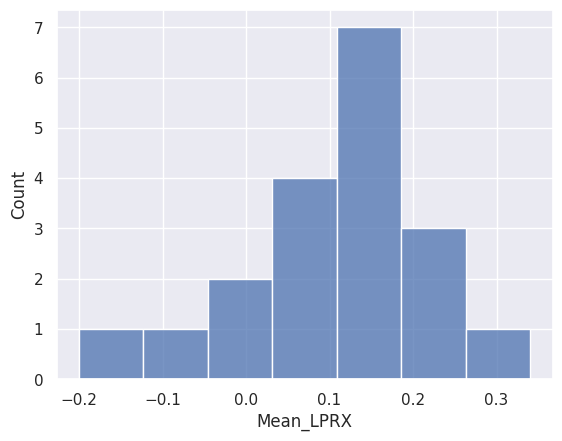

In [107]:
#histogram of the dependent variable
sbn.set(style="darkgrid")
sbn.histplot(data['Mean_LPRX'])

<Axes: xlabel='Age', ylabel='Count'>

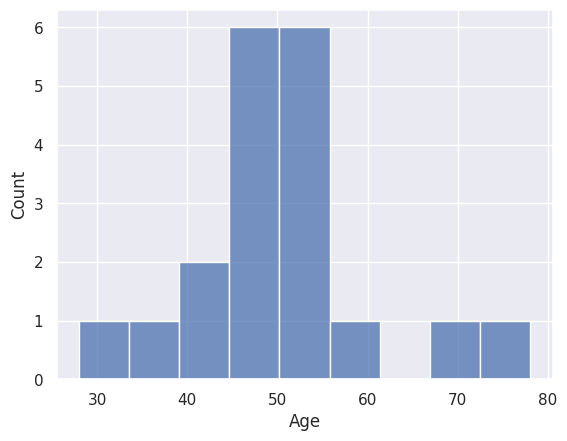

In [110]:
#histogram of the dependent variable
sbn.histplot(data['Age'])

<Axes: xlabel='Single_SD', ylabel='Count'>

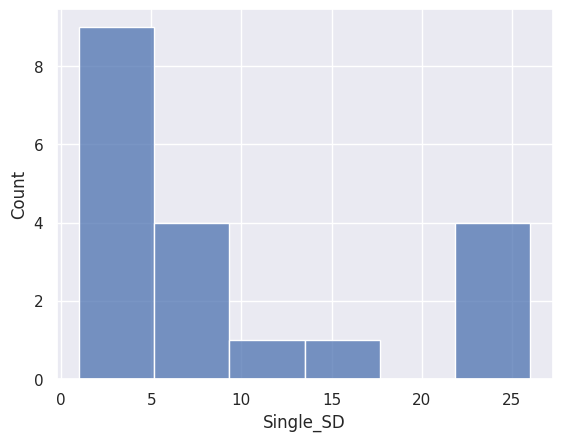

In [109]:
#histogram of the dependent variable
sbn.histplot(data['Single_SD'])

<Axes: xlabel='SD_Day', ylabel='Count'>

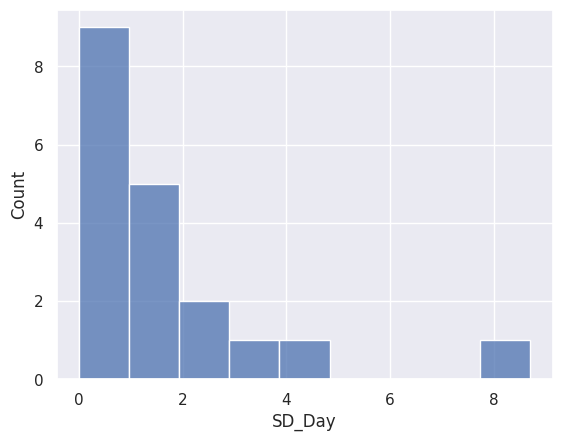

In [108]:
#histogram of the dependent variable
sbn.histplot(data['SD_Day'])


<Axes: xlabel='Clusters_SD', ylabel='Count'>

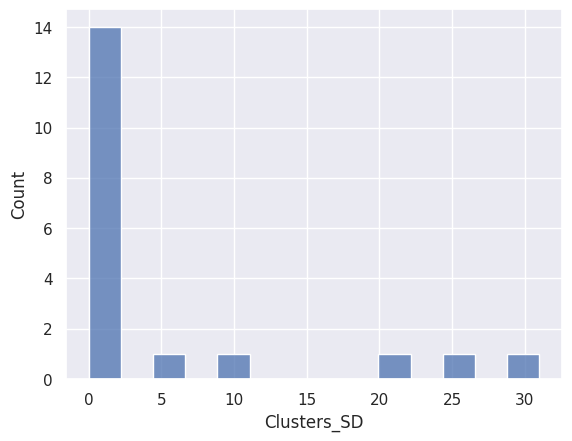

In [111]:
#histogram of the dependent variable
sbn.histplot(data['Clusters_SD'])


<Axes: xlabel='Total_SD', ylabel='Count'>

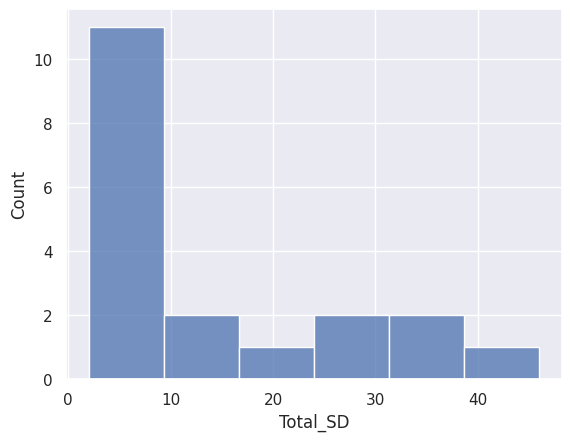

In [112]:
#histogram of the dependent variable
sbn.histplot(data['Total_SD'])

Pearson Corr Age vs Mean LPRX: 0.36 p-value: 0.13


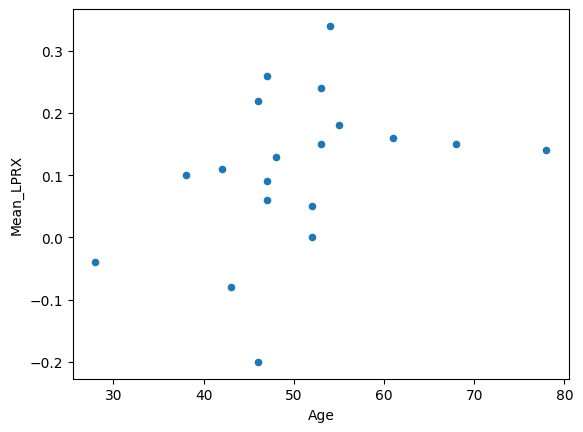

In [32]:
# Valid
# Relationship with numerical variables (Age vs Mean LPRX)
# Scatter plot
result = data.loc[:,["Age","Mean_LPRX"]]
result.plot.scatter(x="Age", y='Mean_LPRX')
# Correlation
res = stats.pearsonr(data['Age'], data['Mean_LPRX'])
print(f"Pearson Correlation between Age vs Mean LPRX: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs SD_Day: -0.06 p-value: 0.81


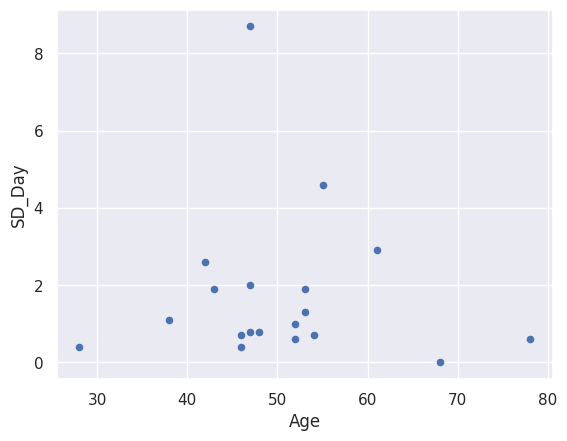

In [113]:
# Valid
# Relationship with numerical variables (Age vs SD_Day)
#Total_SD	Single_SD	Clusters_SD
# Scatter plot
result = data.loc[:,["Age","SD_Day"]]
result.plot.scatter(x="Age", y='SD_Day')
# Correlation
res = stats.pearsonr(data['Age'], data['SD_Day'])
print(f"Pearson Correlation between Age vs SD_Day: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs Single_SD: 0.07 p-value: 0.77


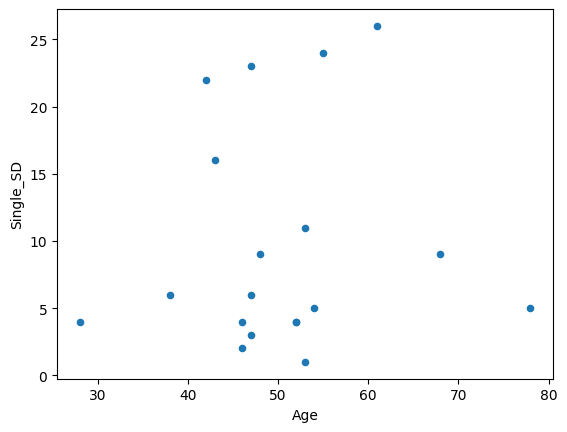

In [35]:
# Valid
# Relationship with numerical variables (Age vs Single_SD)
#Total_SD		Clusters_SD
# Scatter plot
result = data.loc[:,["Age","Single_SD"]]
result.plot.scatter(x="Age", y='Single_SD')
# Correlation
res = stats.pearsonr(data['Age'], data['Single_SD'])
print(f"Pearson Correlation between Age vs Single_SD: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs Clusters_SD: 0.07 p-value: 0.78


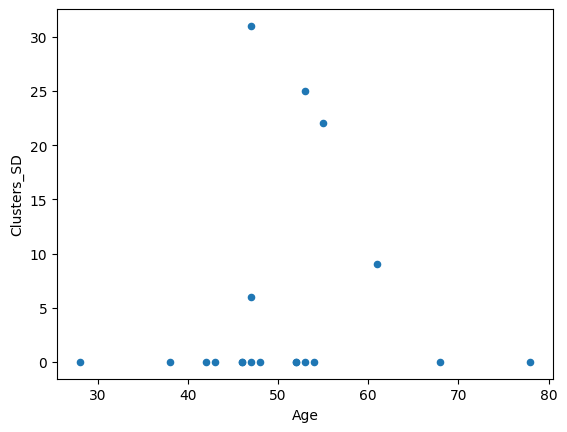

In [36]:
# Valid
# Relationship with numerical variables (Age vs Clusters_SD)
#Total_SD		
# Scatter plot
result = data.loc[:,["Age","Clusters_SD"]]
result.plot.scatter(x="Age", y='Clusters_SD')
# Correlation
res = stats.pearsonr(data['Age'], data['Clusters_SD'])
print(f"Pearson Correlation between Age vs Clusters_SD: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs Total_SD: 0.09 p-value: 0.70


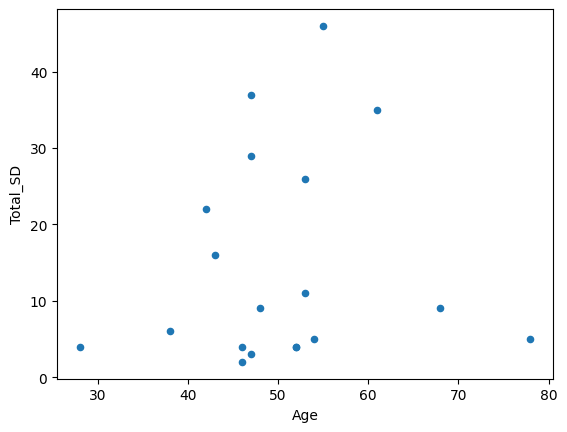

In [37]:
# Valid
# Relationship with numerical variables (Age vs Total_SD)
# Scatter plot
result = data.loc[:,["Age","Total_SD"]]
result.plot.scatter(x="Age", y='Total_SD')
# Correlation
res = stats.pearsonr(data['Age'], data['Total_SD'])
print(f"Pearson Correlation between Age vs Total_SD: {res[0]:.2f} p-value: {res[1]:.2f}" )

## Pearson Correlation

Linear relationship (continuous variables)

- Positive correlation: As variable 1 increases, variable 2 also increases.
- No correlation.
- Negative correlation: As variable 1 increases, variable 2 decreases.

Normally distributed

Null Hypothesis: No correlation between the variables

p < 0.05 => statistically significant

<Axes: >

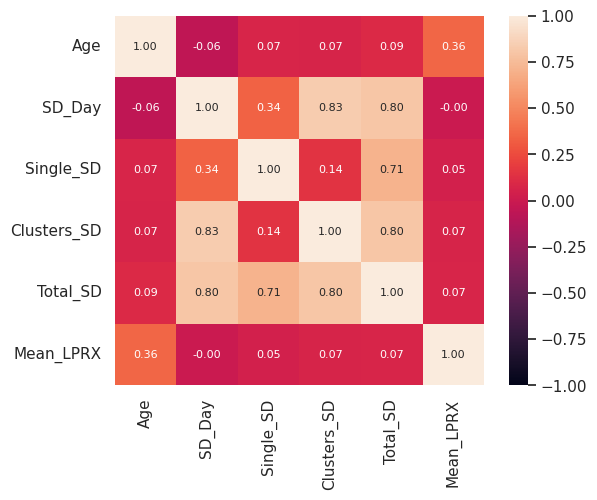

In [114]:
#correlation matrix
sub_data_corr = data.loc[:,
                             ['Age', 'SD_Day', 'Single_SD', 'Clusters_SD', 'Total_SD', 'Mean_LPRX']]

corrmat = sub_data_corr.corr()
sbn.heatmap(corrmat, cbar=True, annot=True, vmin=-1,vmax=1, square=True, fmt='.2f', annot_kws={'size': 8})

## Spearman Corrrelation

Monotomic variables (continuous or ordinal)
- Positive association: As variable 1 increases, variable 2 does not increase.
- Negative association: As variable 1 increases, variable 2 does not increase.

Non-parametric: does not assume data#s distribution.

Variables are ranked.


In [117]:
# Data Transformation

# Sex (dichotonomous variable) (Ordinal => numeric)
data["Sex_Num"] = 0
data.loc[data["Sex"] ==  "F", 'Sex_Num'] = 0
data.loc[data["Sex"] ==  "M", 'Sex_Num'] = 1

# WFNS_Group (dichotonomous variable) (Ordinal => numeric)
data["WFNS_Group_Num"] = 0
data.loc[data["WFNS_Group"] ==  "high-grade", 'WFNS_Group_Num'] = 1
data.loc[data["WFNS_Group"] ==  "Low-grade", 'WFNS_Group_Num'] = 0

# Aneursym_location (nominal variable, but there is no order in values)
# One hot encodig is needed (categorical/nominal => Numeric)
anae_values_dummies = pd.get_dummies(data["Aneursym_location"], prefix="AL") 
sub_data = pd.concat([data, anae_values_dummies], axis='columns')


# DCI (nominal variable, but there is no order in values)
# get the dummies and store it in a variable
dci_dummies = pd.get_dummies(data["DCI"], prefix="DCI") 
# Concatenate the dummies to original dataframe
sub_data = pd.concat([sub_data, dci_dummies], axis='columns')


#print(sub_data)
sub_data = sub_data.loc[:,
                       ['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS',
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L','AL_MCA-R', 
                        'DCI_No', 'DCI_Probably', 'DCI_Yes',
                        'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
                   ]
sub_data


# new_col = pd.Categorical(data["Aneursym_location"]).codes
# new_col = pd.Series(new_col)
# # # Concatenate the dummies to original dataframe
# data = pd.concat([data, new_col], axis='columns')
# data.rename(columns={0:"Aneursym_location_Num"}, inplace=True)



,Age,Sex_Num,WFNS_Group_Num,WFNS,AL_Acom,AL_ICA-L (Pcom),AL_ICA-R,AL_ICA-R (Pcom),AL_MCA-L,AL_MCA-R,DCI_No,DCI_Probably,DCI_Yes,eGOS,Single_SD,Clusters_SD,Mean_LPRX
0,55,0,1,4,1,0,0,0,0,0,0,0,1,0,24,22,0.18
1,38,1,1,4,1,0,0,0,0,0,0,0,1,3,6,0,0.10
2,28,0,1,5,0,0,1,0,0,0,0,0,1,3,4,0,-0.04
3,47,1,1,5,1,0,0,0,0,0,1,0,0,4,3,0,0.26
4,68,0,0,2,0,0,0,0,0,1,1,0,0,6,9,0,0.15
5,52,0,1,5,0,0,1,0,0,0,0,0,1,0,4,0,0.05
6,78,1,1,5,0,0,0,1,0,0,0,0,1,3,5,0,0.14
7,46,1,1,4,0,0,0,0,1,0,1,0,0,3,4,0,-0.20
8,54,0,1,4,0,0,0,0,1,0,1,0,0,2,5,0,0.34
9,52,1,1,5,1,0,0,0,0,0,0,0,1,0,4,0,0.00


WFNS vs Age:  SignificanceResult(statistic=0.11313251295689733, pvalue=0.6446979894466642)
eGOS vs Age:  SignificanceResult(statistic=-0.23772295053110082, pvalue=0.3270820905466634)
WFNS Group vs Age:  SignificanceResult(statistic=0.09850093141103416, pvalue=0.688283826518594)


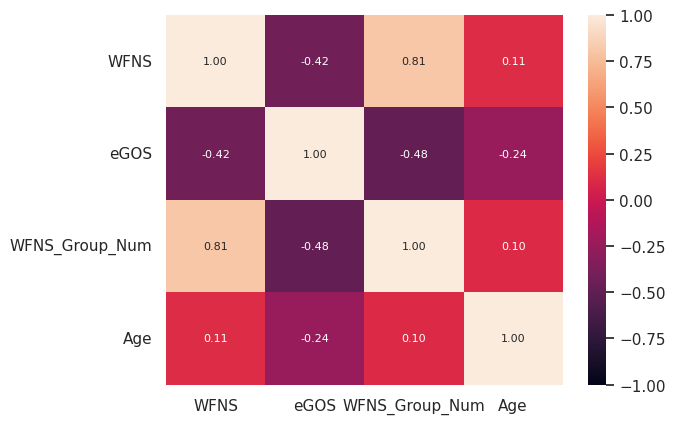

In [125]:
# Valid
from scipy.stats import spearmanr
# Spearman correlation
#col_data  = sub_data.loc[:,["WFNS","eGOS", "WFNS_Group_Num"]]
col_data  = sub_data.loc[:,["WFNS", "eGOS", "WFNS_Group_Num","Age"]]
res = col_data.corr(method="spearman")
#print(res.head())

# print(spearmanr(col_data)[0])
# print(spearmanr(col_data)[1])
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

col_data  = sub_data.loc[:,["WFNS", "Age"]]
res = col_data.corr(method="spearman")
print("WFNS vs Age: ",spearmanr(col_data))

col_data  = sub_data.loc[:,["eGOS", "Age"]]
res = col_data.corr(method="spearman")
print("eGOS vs Age: ",spearmanr(col_data))

col_data  = sub_data.loc[:,["WFNS_Group_Num", "Age"]]
res = col_data.corr(method="spearman")
print("WFNS Group vs Age: ",spearmanr(col_data))

# print(spearmanr(col_data)[0])
# print(spearmanr(col_data)[1])


Pearson Correlation between WFNS vs eGOS: -0.48 p-value: 0.04


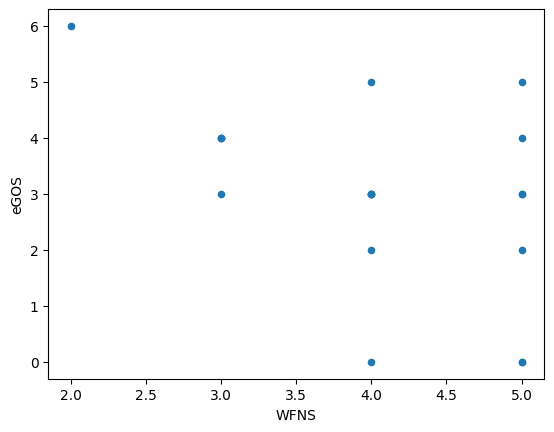

In [49]:
# Relationship with numerical variables (Age vs Total_SD)
# Scatter plot
result = sub_data.loc[:,["WFNS","eGOS"]]
result.plot.scatter(x="WFNS", y='eGOS')
# Correlation
res = stats.pearsonr(data['WFNS'], data['eGOS'])
print(f"Pearson Correlation between WFNS vs eGOS: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between WFNS_Group_Num vs eGOS: -0.44 p-value: 0.06


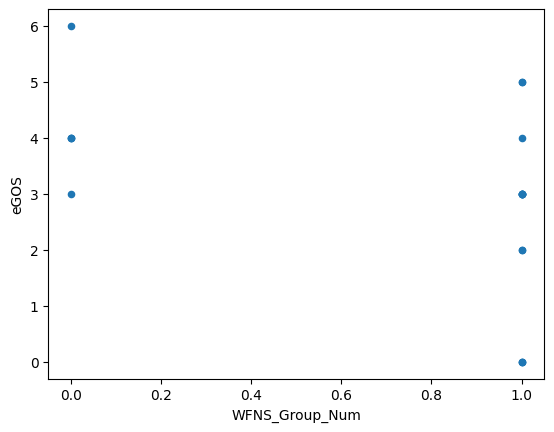

In [50]:
# Relationship with numerical variables (Age vs WFNS_Group_Num)
# Scatter plot
result = sub_data.loc[:,["WFNS_Group_Num","eGOS"]]
result.plot.scatter(x="WFNS_Group_Num", y='eGOS')
# Correlation
res = stats.pearsonr(data['WFNS_Group_Num'], data['eGOS'])
print(f"Pearson Correlation between WFNS_Group_Num vs eGOS: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between WFNS_Group_Num vs WFNS: 0.84 p-value: 0.00


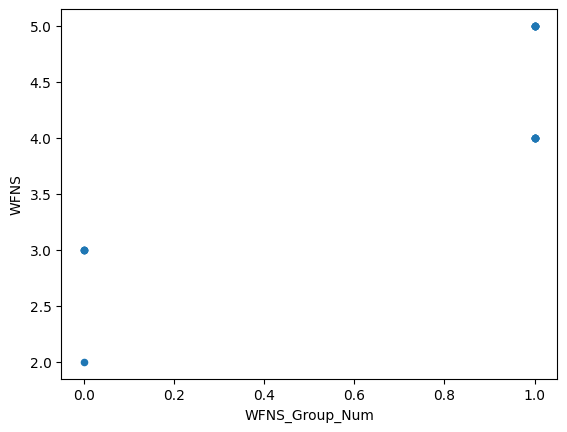

In [51]:
# Relationship with numerical variables (Age vs WFNS_Group_Num)
# Scatter plot
result = sub_data.loc[:,["WFNS_Group_Num","WFNS"]]
result.plot.scatter(x="WFNS_Group_Num", y='WFNS')
# Correlation
res = stats.pearsonr(data['WFNS_Group_Num'], data['WFNS'])
print(f"Pearson Correlation between WFNS_Group_Num vs WFNS: {res[0]:.2f} p-value: {res[1]:.2f}" )

### WFNS Group

In [ ]:

from scipy.stats import spearmanr
# Spearman correlation
col_data  = data.loc[:,["WFNS_Group_Num","eGOS", "Total_SD", "Single_SD", "Clusters_SD", "Mean_LPRX"]]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

In [ ]:
# Spearman correlation
col_data = sub_data.loc[:,[
                        'DCI_No', 'DCI_Probably', 'DCI_Yes',
                        "WFNS_Group_Num"]]
res = col_data.corr(method="spearman")
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### eGOS

In [ ]:

from scipy.stats import spearmanr
# Spearman correlation
col_data  = data.loc[:,["eGOS","eGOS", "Total_SD", "Single_SD", "Clusters_SD", "Mean_LPRX"]]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### DCI

In [52]:
# sub_data["Total_SD"] = data["Total_SD"]
# sub_data["Single_SD"] = data["Single_SD"]
# sub_data["Clusters_SD"] = data["Clusters_SD"]
# print(data.columns)
# print(sub_data.columns)

In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'Total_SD', 'Single_SD', 'Clusters_SD', "Mean_LPRX",
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### Age

In [ ]:
#correlation matrix
sub_data_corr = sub_data.loc[:,
                             ['Age', 'Sex_Num','Single_SD', 'Clusters_SD', 'Mean_LPRX']]

corrmat = sub_data_corr.corr()
#print(res.head())
_result = pearsonr(sub_data['Age'], sub_data['Sex_Num'])
print(_result)
_result = pearsonr(sub_data['Age'], sub_data['Single_SD'])
print(_result)
_result = pearsonr(sub_data['Age'], sub_data['Clusters_SD'])
print(_result)
_result = pearsonr(sub_data['Age'], sub_data['Mean_LPRX'])
print(_result)
sbn.heatmap(corrmat, cbar=True, annot=True, vmin=-1,vmax=1, square=True, fmt='.2f', annot_kws={'size': 8})

In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'Age', 'WFNS_Group_Num', 'eGOS',
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### Sex

In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'Sex_Num', 'WFNS', 'WFNS_Group_Num', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX',
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### Aneurysm location

In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                        #'Sex_Num', 'WFNS', 'WFNS_Group_Num', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX',
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                        'Sex_Num', 'WFNS', 'WFNS_Group_Num'
                        ]] # 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX'
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                        'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX'
                        ]] 
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

## Point Biserial Correlation

In [140]:
from scipy.stats import pointbiserialr
pbc = pointbiserialr(data["WFNS"], data["Mean_LPRX"])
print(f"WFNS vs Mean_LPRX:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS"], data["Single_SD"])
print(f"WFNS vs Single_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS"], data["Clusters_SD"])
print(f"WFNS vs Clusters_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS"], data["Total_SD"])
print(f"WFNS vs Total_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS"], data["SD_Day"])
print(f"WFNS vs SD_Day:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS"], data["Age"])
print(f"WFNS vs Age:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
#stats.pointbiserialr(a, b)

WFNS vs Mean_LPRX:  statistic: 0.02 p-value: 0.95
WFNS vs Single_SD:  statistic: -0.34 p-value: 0.16
WFNS vs Clusters_SD:  statistic: 0.09 p-value: 0.72
WFNS vs Total_SD:  statistic: -0.14 p-value: 0.57
WFNS vs SD_Day:  statistic: -0.02 p-value: 0.95
WFNS vs Age:  statistic: -0.04 p-value: 0.86


In [141]:
from scipy.stats import pointbiserialr
pbc = pointbiserialr(data["WFNS_Group_Num"], data["Mean_LPRX"])
print(f"WFNS_Group_Num vs Mean_LPRX:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS_Group_Num"], data["Single_SD"])
print(f"WFNS_Group_Num vs Single_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS_Group_Num"], data["Clusters_SD"])
print(f"WFNS_Group_Num vs Clusters_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS_Group_Num"], data["Total_SD"])
print(f"WFNS_Group_Num vs Total_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS_Group_Num"], data["SD_Day"])
print(f"WFNS_Group_Num vs SD_Day:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(data["WFNS_Group_Num"], data["Age"])
print(f"WFNS_Group_Num vs Age:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
#stats.pointbiserialr(a, b)

WFNS_Group_Num vs Mean_LPRX:  statistic: 0.03 p-value: 0.90
WFNS_Group_Num vs Single_SD:  statistic: -0.16 p-value: 0.52
WFNS_Group_Num vs Clusters_SD:  statistic: 0.23 p-value: 0.34
WFNS_Group_Num vs Total_SD:  statistic: 0.07 p-value: 0.77
WFNS_Group_Num vs SD_Day:  statistic: 0.20 p-value: 0.41
WFNS_Group_Num vs Age:  statistic: 0.00 p-value: 1.00


In [144]:
from scipy.stats import pointbiserialr
pbc = pointbiserialr(sub_data["Sex_Num"], data["Mean_LPRX"])
print(f"Sex vs Mean_LPRX:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(sub_data["Sex_Num"], data["Single_SD"])
print(f"Sex vs Single_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(sub_data["Sex_Num"], data["Clusters_SD"])
print(f"Sex vs Clusters_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(sub_data["Sex_Num"], data["Total_SD"])
print(f"Sex vs Total_SD:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(sub_data["Sex_Num"], data["SD_Day"])
print(f"Sex vs SD_Day:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
pbc = pointbiserialr(sub_data["Sex_Num"], data["Age"])
print(f"Sex vs Age:  statistic: {pbc[0]:.2f} p-value: {pbc[1]:.2f}")
#stats.pointbiserialr(a, b)

Sex vs Mean_LPRX:  statistic: -0.05 p-value: 0.85
Sex vs Single_SD:  statistic: 0.05 p-value: 0.84
Sex vs Clusters_SD:  statistic: -0.32 p-value: 0.18
Sex vs Total_SD:  statistic: -0.20 p-value: 0.41
Sex vs SD_Day:  statistic: -0.25 p-value: 0.29
Sex vs Age:  statistic: 0.16 p-value: 0.51


In [134]:
from scipy.stats import pointbiserialr
pbc = pointbiserialr(data["eGOS"], data["Mean_LPRX"])
print("eGOS vs Mean LPRX: ", pbc)


eGOS vs Mean LPRX:  SignificanceResult(statistic=0.12087433289856155, pvalue=0.6220665339835298)


In [16]:

# def performChi2test(col1,col2):
#     print("-------------------------------------------------")
#     print(f"-------- {col1} vs {col2} ------")
#     print("-------------------------------------------------")
#     # Cross tabulation between GENDER and APPROVE_LOAN
#     CrosstabResult=pd.crosstab(index=sub_data[col1],columns=sub_data[col2])
#     print(CrosstabResult)    
#     # importing the required function
#     from scipy.stats import chi2_contingency
#     # Performing Chi-sq test (independence between 2 categorical values)
#     ChiSqResult = chi2_contingency(CrosstabResult)    
#     # Assumption(H0): The two columns are NOT related to each other
#     # P-Value is the Probability of H0 being True
#     # If P-value is > 0.05 then only we Accept the assumption(H0)
#     print(f"The P-Value of the ChiSq Test is: {ChiSqResult[1]:.4f}")
#     x = "Variables not correlated to each other" if ChiSqResult[1] > 0.05 else "Variables correlated to each other"
#     print(x)    

# #performChi2test("Sex","Aneursym_location")
# #performChi2test("Sex","DCI")
# performChi2test("Aneursym_location","DCI")

## Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

sub_data.columns

X = sub_data.loc[:,['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'AL_Acom',
       'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L',
       'AL_MCA-R',  'DCI_No', 'DCI_Probably', 'DCI_Yes', 'eGOS',
       'Single_SD', 'Clusters_SD']]

Y = sub_data["Mean_LPRX"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
    
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
print(f"Intercept: {model.intercept_} \n Coefficients: {model.coef_} \n R2 = {model.score(X, Y)}")

In [ ]:
import statsmodels.api as sm


X = sub_data.loc[:,[
        'Age', 
        'Sex_Num', 
        #'WFNS_Group_Num', 
        #'WFNS', 
        'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R', 'AL_Acom',
        #'DCI_NUM', 
        'DCI_No', 'DCI_Probably', 'DCI_Yes', 
        #'eGOS',
        #'Single_SD', 
        #'Clusters_SD'
       ]]
Y = sub_data["Mean_LPRX"]
#Y = sub_data["Mean_LPRX"] clusters
#Y = sub_data["Mean_LPRX"]
#Y = sub_data["Mean_LPRX"]
# y = x1 + x2 + x3 +...
#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

In [19]:
#display regression coefficients and R-squared value of model

from scipy.stats import chi2_contingency
  
# defining the table
data = [data["Age"], data[""]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

In [53]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [54]:
data

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX,Sex_Num,WFNS_Group_Num
0,HD-1,55,F,high-grade,4,Acom,Yes,0,4.6,46,24,22,0.18,0,1
1,HD-2,38,M,high-grade,4,Acom,Yes,3,1.1,6,6,0,0.10,1,1
2,HD-3,28,F,high-grade,5,ICA-R,Yes,3,0.4,4,4,0,-0.04,0,1
3,HD-4,47,M,high-grade,5,Acom,No,4,0.8,3,3,0,0.26,1,1
4,HD-5,68,F,Low-grade,2,MCA-R,No,6,0.0,9,9,0,0.15,0,0
5,HD-6,52,F,high-grade,5,ICA-R,Yes,0,0.6,4,4,0,0.05,0,1
6,HD-7,78,M,high-grade,5,ICA-R (Pcom),Yes,3,0.6,5,5,0,0.14,1,1
7,HD-8,46,M,high-grade,4,MCA-L,No,3,0.4,4,4,0,-0.20,1,1
8,HD-9,54,F,high-grade,4,MCA-L,No,2,0.7,5,5,0,0.34,0,1
9,HD-10,52,M,high-grade,5,Acom,Yes,0,1.0,4,4,0,0.00,1,1


### ANOVA WITH WFNS

In [104]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS")["Mean_LPRX"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS
2                                        [0.15]
3                     [0.13, -0.08, 0.22, 0.09]
4     [0.18, 0.1, -0.2, 0.34, 0.16, 0.11, 0.06]
5    [-0.04, 0.26, 0.05, 0.14, 0.0, 0.15, 0.24]
Name: Mean_LPRX, dtype: object
P-Value for Anova is:  0.980825888372246


In [103]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS")["Age"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS
2                            [68]
3                [48, 43, 46, 47]
4    [55, 38, 46, 54, 61, 42, 47]
5    [28, 47, 52, 78, 52, 53, 53]
Name: Age, dtype: object
P-Value for Anova is:  0.33116191040746296


In [94]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS")["Clusters_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS
2                        [0]
3               [0, 0, 0, 6]
4    [22, 0, 0, 0, 9, 0, 31]
5     [0, 0, 0, 0, 0, 25, 0]
Name: Clusters_SD, dtype: object
P-Value for Anova is:  0.6102811394717242


In [96]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS")["Single_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS
2                         [9]
3              [9, 16, 2, 23]
4    [24, 6, 4, 5, 26, 22, 6]
5      [4, 3, 4, 5, 4, 1, 11]
Name: Single_SD, dtype: object
P-Value for Anova is:  0.21596492766292175


In [97]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS")["SD_Day"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS
2                                  [0.0]
3                   [0.8, 1.9, 0.7, 2.0]
4    [4.6, 1.1, 0.4, 0.7, 2.9, 2.6, 8.7]
5    [0.4, 0.8, 0.6, 0.6, 1.0, 1.9, 1.3]
Name: SD_Day, dtype: object
P-Value for Anova is:  0.19412522536925517


In [128]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS")["Total_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS
2                          [9]
3               [9, 16, 2, 29]
4    [46, 6, 4, 5, 35, 22, 37]
5      [4, 3, 4, 5, 4, 26, 11]
Name: Total_SD, dtype: object
P-Value for Anova is:  0.29200457309511596


### ANOVA with WFNS GROUP

In [93]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS_Group")["SD_Day"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS_Group
Low-grade                             [0.0, 0.8, 1.9, 0.7, 2.0]
high-grade    [4.6, 1.1, 0.4, 0.8, 0.6, 0.6, 0.4, 0.7, 1.0, ...
Name: SD_Day, dtype: object
P-Value for Anova is:  0.41146316475071143


In [86]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS_Group")["Age"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS_Group
Low-grade                                  [68, 48, 43, 46, 47]
high-grade    [55, 38, 28, 47, 52, 78, 46, 54, 52, 61, 42, 5...
Name: Age, dtype: object
P-Value for Anova is:  0.9961173963089911


In [127]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS_Group")["Mean_LPRX"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS_Group
Low-grade                       [0.15, 0.13, -0.08, 0.22, 0.09]
high-grade    [0.18, 0.1, -0.04, 0.26, 0.05, 0.14, -0.2, 0.3...
Name: Mean_LPRX, dtype: object
P-Value for Anova is:  0.8994924278052399


In [88]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS_Group")["Total_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS_Group
Low-grade                                    [9, 9, 16, 2, 29]
high-grade    [46, 6, 4, 3, 4, 5, 4, 5, 4, 35, 22, 26, 11, 37]
Name: Total_SD, dtype: object
P-Value for Anova is:  0.773321665357541


In [89]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS_Group")["Single_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS_Group
Low-grade                                  [9, 9, 16, 2, 23]
high-grade    [24, 6, 4, 3, 4, 5, 4, 5, 4, 26, 22, 1, 11, 6]
Name: Single_SD, dtype: object
P-Value for Anova is:  0.5191788059389846


In [90]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("WFNS_Group")["Clusters_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

WFNS_Group
Low-grade                                   [0, 0, 0, 0, 6]
high-grade    [22, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 25, 0, 31]
Name: Clusters_SD, dtype: object
P-Value for Anova is:  0.34075278153640576


### ANOVA with Sex

In [80]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Sex")["Mean_LPRX"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Sex
F    [0.18, -0.04, 0.15, 0.05, 0.34, -0.08, 0.22, 0...
M    [0.1, 0.26, 0.14, -0.2, 0.0, 0.16, 0.13, 0.24,...
Name: Mean_LPRX, dtype: object
P-Value for Anova is:  0.8464706176890578


In [81]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Sex")["Age"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Sex
F    [55, 28, 68, 52, 54, 43, 46, 42, 53, 47]
M        [38, 47, 78, 46, 52, 61, 48, 53, 47]
Name: Age, dtype: object
P-Value for Anova is:  0.5058241541624848


In [82]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Sex")["Clusters_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Sex
F    [22, 0, 0, 0, 0, 0, 0, 0, 25, 31]
M          [0, 0, 0, 0, 0, 9, 0, 0, 6]
Name: Clusters_SD, dtype: object
P-Value for Anova is:  0.1805746527532237


In [83]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Sex")["Single_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Sex
F    [24, 4, 9, 4, 5, 16, 2, 22, 1, 6]
M       [6, 3, 5, 4, 4, 26, 9, 11, 23]
Name: Single_SD, dtype: object
P-Value for Anova is:  0.8373371721411912


In [84]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Sex")["SD_Day"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Sex
F    [4.6, 0.4, 0.0, 0.6, 0.7, 1.9, 0.7, 2.6, 1.9, ...
M        [1.1, 0.8, 0.6, 0.4, 1.0, 2.9, 0.8, 1.3, 2.0]
Name: SD_Day, dtype: object
P-Value for Anova is:  0.2935691980490926


### ANOVA with DCI

In [75]:
########################################################
# valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("DCI")["Mean_LPRX"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

DCI
No          [0.26, 0.15, -0.2, 0.34, 0.16, 0.13, -0.08, 0....
Probably                                         [0.11, 0.15]
Yes                       [0.18, 0.1, -0.04, 0.05, 0.14, 0.0]
Name: Mean_LPRX, dtype: object
P-Value for Anova is:  0.7149711592258103


In [76]:
########################################################
# valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("DCI")["Age"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

DCI
No          [47, 68, 46, 54, 61, 48, 43, 46, 53, 47, 47]
Probably                                        [42, 53]
Yes                             [55, 38, 28, 52, 78, 52]
Name: Age, dtype: object
P-Value for Anova is:  0.9271775693006211


In [77]:
########################################################
# valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("DCI")["Clusters_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

DCI
No          [0, 0, 0, 0, 9, 0, 0, 0, 0, 6, 31]
Probably                               [0, 25]
Yes                        [22, 0, 0, 0, 0, 0]
Name: Clusters_SD, dtype: object
P-Value for Anova is:  0.5347970936513403


In [78]:
########################################################
# valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("DCI")["Single_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

DCI
No          [3, 9, 4, 5, 26, 9, 16, 2, 11, 23, 6]
Probably                                  [22, 1]
Yes                           [24, 6, 4, 4, 5, 4]
Name: Single_SD, dtype: object
P-Value for Anova is:  0.8075192115736787


In [79]:
########################################################
# valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("DCI")["SD_Day"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

DCI
No          [0.8, 0.0, 0.4, 0.7, 2.9, 0.8, 1.9, 0.7, 1.3, ...
Probably                                           [2.6, 1.9]
Yes                            [4.6, 1.1, 0.4, 0.6, 0.6, 1.0]
Name: SD_Day, dtype: object
P-Value for Anova is:  0.8581095845488489


In [131]:
########################################################
# valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("DCI")["Total_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

DCI
No          [3, 9, 4, 5, 35, 9, 16, 2, 11, 29, 37]
Probably                                  [22, 26]
Yes                            [46, 6, 4, 4, 5, 4]
Name: Total_SD, dtype: object
P-Value for Anova is:  0.5621830134577966


### ANOVA with Aneurysm Location

In [69]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
# 	Total_SD	Single_SD	Clusters_SD	Mean_LPRX
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Aneursym_location")["Mean_LPRX"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Aneursym_location
Acom            [0.18, 0.1, 0.26, 0.0, 0.16, 0.11, 0.15, 0.24]
ICA-L (Pcom)                                            [0.13]
ICA-R                                            [-0.04, 0.05]
ICA-R (Pcom)                                            [0.14]
MCA-L                    [-0.2, 0.34, -0.08, 0.22, 0.09, 0.06]
MCA-R                                                   [0.15]
Name: Mean_LPRX, dtype: object
P-Value for Anova is:  0.7728576133456618


In [72]:
########################################################
# Not valid
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
# 	Total_SD	Single_SD	Clusters_SD	Mean_LPRX
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Aneursym_location")["Clusters_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Aneursym_location
Acom            [22, 0, 0, 0, 9, 0, 25, 0]
ICA-L (Pcom)                           [0]
ICA-R                               [0, 0]
ICA-R (Pcom)                           [0]
MCA-L                  [0, 0, 0, 0, 6, 31]
MCA-R                                  [0]
Name: Clusters_SD, dtype: object
P-Value for Anova is:  0.9194270892400721


In [74]:
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
# 	Total_SD	Single_SD	Clusters_SD	Mean_LPRX
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Aneursym_location")["Single_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Aneursym_location
Acom            [24, 6, 3, 4, 26, 22, 1, 11]
ICA-L (Pcom)                             [9]
ICA-R                                 [4, 4]
ICA-R (Pcom)                             [5]
MCA-L                   [4, 5, 16, 2, 23, 6]
MCA-R                                    [9]
Name: Single_SD, dtype: object
P-Value for Anova is:  0.8888474237688729


In [71]:
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
# SD_Day	Total_SD	Single_SD	Clusters_SD	Mean_LPRX
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Aneursym_location")["SD_Day"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Aneursym_location
Acom            [4.6, 1.1, 0.8, 1.0, 2.9, 2.6, 1.9, 1.3]
ICA-L (Pcom)                                       [0.8]
ICA-R                                         [0.4, 0.6]
ICA-R (Pcom)                                       [0.6]
MCA-L                     [0.4, 0.7, 1.9, 0.7, 2.0, 8.7]
MCA-R                                              [0.0]
Name: SD_Day, dtype: object
P-Value for Anova is:  0.7797286991724199


In [129]:
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
# SD_Day	Total_SD	Single_SD	Clusters_SD	Mean_LPRX
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Aneursym_location")["Total_SD"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Aneursym_location
Acom            [46, 6, 3, 4, 35, 22, 26, 11]
ICA-L (Pcom)                              [9]
ICA-R                                  [4, 4]
ICA-R (Pcom)                              [5]
MCA-L                   [4, 5, 16, 2, 29, 37]
MCA-R                                     [9]
Name: Total_SD, dtype: object
P-Value for Anova is:  0.7680289278879051


In [70]:
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists= data.groupby("Aneursym_location")["Age"].apply(list)
print(CategoryGroupLists)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

Aneursym_location
Acom            [55, 38, 47, 52, 61, 42, 53, 53]
ICA-L (Pcom)                                [48]
ICA-R                                   [28, 52]
ICA-R (Pcom)                                [78]
MCA-L                   [46, 54, 43, 46, 47, 47]
MCA-R                                       [68]
Name: Age, dtype: object
P-Value for Anova is:  0.01075408655376969


### DCI vs Aneursym Location

In [98]:
########################################################
# valid
########################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['DCI'],columns=data['Aneursym_location'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Aneursym_location  Acom  ICA-L (Pcom)  ICA-R  ICA-R (Pcom)  MCA-L  MCA-R
DCI                                                                     
No                    3             1      0             0      6      1
Probably              2             0      0             0      0      0
Yes                   3             0      2             1      0      0
The P-Value of the ChiSq Test is: 0.14838752984417053


In [100]:
########################################################
# valid
########################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['DCI'],columns=data['Sex'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Sex       F  M
DCI           
No        5  6
Probably  2  0
Yes       3  3
The P-Value of the ChiSq Test is: 0.35988537645429286


In [130]:
########################################################
# Not valid
# Kruskal-Wallis Test
########################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['Aneursym_location'],columns=data['Sex'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Sex                F  M
Aneursym_location      
Acom               3  5
ICA-L (Pcom)       0  1
ICA-R              2  0
ICA-R (Pcom)       0  1
MCA-L              4  2
MCA-R              1  0
The P-Value of the ChiSq Test is: 0.29367824179125046


In [101]:
########################################################
# Not valid
# Kruskal-Wallis Test
########################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['DCI'],columns=data['WFNS_Group'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

WFNS_Group  Low-grade  high-grade
DCI                              
No                  5           6
Probably            0           2
Yes                 0           6
The P-Value of the ChiSq Test is: 0.08479383260595784


In [102]:
########################################################
# Not valid
# Kruskal-Wallis Test
########################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['DCI'],columns=data['WFNS'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

WFNS      2  3  4  5
DCI                 
No        1  4  4  2
Probably  0  0  1  1
Yes       0  0  2  4
The P-Value of the ChiSq Test is: 0.3869038966615515


In [99]:
data.columns

Index(['Patient', 'Age', 'Sex', 'WFNS_Group', 'WFNS', 'Aneursym_location',
       'DCI', 'eGOS', 'SD_Day', 'Total_SD', 'Single_SD', 'Clusters_SD',
       'Mean_LPRX', 'Sex_Num', 'WFNS_Group_Num'],
      dtype='object')